<a href="https://colab.research.google.com/github/syamsulrizal123/TA_Covid19/blob/main/scenes_nn_4_layers_dickyprigara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1W9Y7q3Uc-ofdWnVfSHjCWVF88LEqwHTf'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

FileNotDownloadableError: ignored

In [2]:
cd /content/drive/MyDrive/COVID-CTset/

/content/drive/.shortcut-targets-by-id/1W9Y7q3Uc-ofdWnVfSHjCWVF88LEqwHTf/COVID-CTset


In [3]:
ls

covid1/  normal1/   normal2/  normal4/  normal6/  normal8/
covid2/  normal10/  normal3/  normal5/  normal7/  normal9/


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import matplotlib.pyplot as plt

In [18]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("/content/drive/MyDrive/COVID-CTset/covid1/patient1/SR_2")
data = []
labels = []

[INFO] loading images...


In [20]:
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale
    # the pixel intensities to the range [0, 1], and then update our
    # images list
  image = Image.open(imagePath)
  image = image.convert('L')
  image = np.array(image.resize((224,224))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
    # labels list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [11]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  image = image.convert('L')
	image = np.array(image.resize((224, 224))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

IndentationError: ignored

In [14]:
print(labels)

[]


In [ ]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/COVID-CTset/covid1/patient1/SR_2/IM00001.tif')
im.show()

In [ ]:
from libtiff import TIFF

tif = TIFF.open('IM00001.tif') # open tiff file in read mode
# read an image in the currect TIFF directory as a numpy array
image = tif.read_image()

# read all images in a TIFF file:
for image in tif.iter_images(): 
    pass

tif = TIFF.open('IM00001.tif', mode='w')
tif.write_image(image)

ModuleNotFoundError: ignored

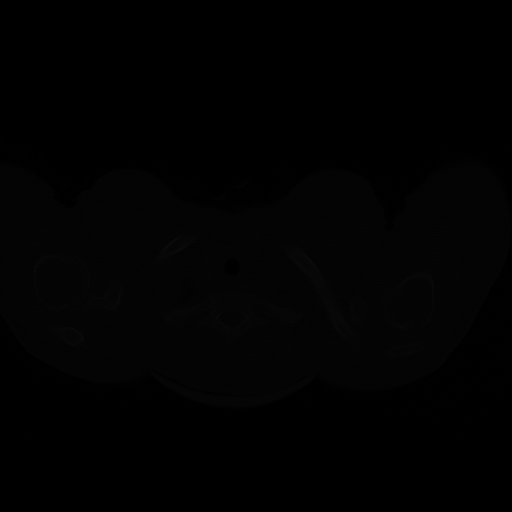

In [ ]:
imarray = np.array(im)
imarray.shape
Image.fromarray(imarray)

In [21]:

import io
import numpy as np
path='/content/drive/MyDrive/COVID-CTset/covid1/patient1/SR_2/IM00001.tif'
save_path='/content/drive/MyDrive'
with open(path, 'rb') as f:
    tif = Image.open(io.BytesIO(f.read()))
array=np.array(tif)
max_val=np.amax(array)
normalized=(array/max_val)
im = Image.fromarray(normalized)
im = Image.fromarray(normalized)

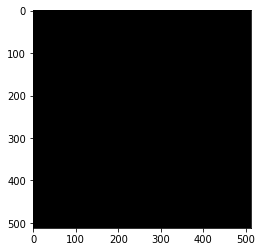

In [ ]:
plt.imshow(im)
plt.show()

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

ValueError: ignored

In [ ]:
print(labels)

[]


In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(711, 224, 224, 3)
(237, 224, 224, 3)
(711, 3)
(237, 3)


In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.applications.resnet import ResNet50
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout

In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
out = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [ ]:
model1=Sequential()
for layer in base_model.layers[:-19]:
  model1.add(layer)

model1.add(GlobalAveragePooling2D())
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)     

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_mobileNet.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [ ]:
model.summary()

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/50
22/23 [===========================>..] - ETA: 0s - loss: 0.1464 - accuracy: 0.9659
Epoch 00001: val_accuracy improved from -inf to 0.64557, saving model to best_weight_scene_mobileNet.h5
23/23 [==============================] - 6s 242ms/step - loss: 0.1453 - accuracy: 0.9662 - val_loss: 4.5741 - val_accuracy: 0.6456
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9930
Epoch 00002: val_accuracy did not improve from 0.64557
23/23 [==============================] - 4s 185ms/step - loss: 0.0417 - accuracy: 0.9930 - val_loss: 5.1989 - val_accuracy: 0.6414
Epoch 3/50
22/23 [===========================>..] - ETA: 0s - loss: 0.1280 - accuracy: 0.9730
Epoch 00003: val_accuracy improved from 0.64557 to 0.99156, saving model to best_weight_scene_mobileNet.h5
23/23 [==============================] - 5s 207ms/step - loss: 0.1400 - accuracy: 0.9705 - val_loss: 0.1948 - val_accuracy: 0.9916
Epoch 4/50
23/23 [==============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


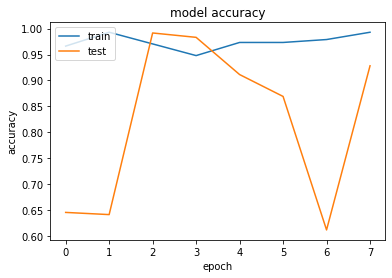

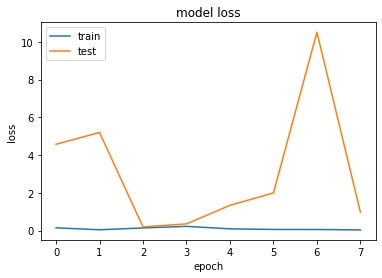

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       1.00      0.99      0.99        85
      forest       0.99      0.99      0.99        89
     highway       0.98      1.00      0.99        63

    accuracy                           0.99       237
   macro avg       0.99      0.99      0.99       237
weighted avg       0.99      0.99      0.99       237



In [ ]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='forest_test.jpg'

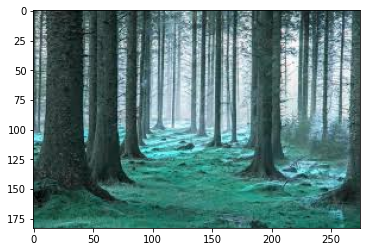

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('forest_test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.02508735 0.9703354  0.00457713]]
['forest']
